In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.drop_duplicates(subset=["Name"], keep=False).shape


(255, 7)

Про скільки книг зберігає дані датасет?
Відповідь: 255

In [5]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# Первинне дослідження даних

In [6]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски?
Відповідь: Ні

In [7]:
df["genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри?
Відповідь: Non Fiction, Fiction

e:\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

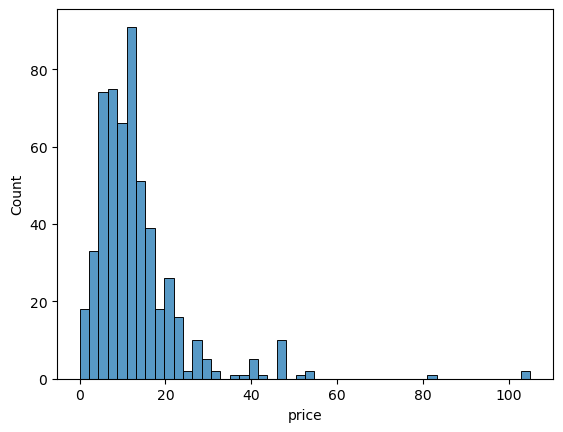

In [8]:
sns.histplot(df, x='price')

In [9]:
df['price'].agg(['min', 'max', 'mean', 'median'])

min         0.0
max       105.0
mean       13.1
median     11.0
Name: price, dtype: float64

Мінімальна ціна?
Відповідь: 0

Максимальна ціна?
Відповідь: 105


Середня ціна?
Відповідь: 13.1

Медіанна ціна?
Відповідь: 11

# Пошук та сортування даних

In [15]:
df['user_rating'].max()

4.9

Який рейтинг у датасеті найвищий? Відповідь: 4.9


In [19]:
df.groupby('user_rating').count()

,name,author,reviews,price,year,genre
user_rating,,,,,,
3.3,1,1,1,1,1,1
3.6,1,1,1,1,1,1
3.8,2,2,2,2,2,2
3.9,3,3,3,3,3,3
4.0,14,14,14,14,14,14
4.1,6,6,6,6,6,6
4.2,8,8,8,8,8,8
4.3,25,25,25,25,25,25
4.4,38,38,38,38,38,38


Скільки книг мають такий рейтинг? Відповідь: 52


In [26]:
df[df['reviews'].max() == df['reviews']]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing


In [44]:
df[(df[df['year'] == 2015]['price'].max() == df['price']) & (df['year'] == 2015)]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychological Association, 6th Edition


In [41]:
df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].count()

name           20
author         20
user_rating    20
reviews        20
price          20
year           20
genre          20
dtype: int64

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20


In [67]:
df[df['user_rating'] == 4.9]['year'].isin([2010, 2011]).sum()

1

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1


In [80]:
df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)

# Агрегування даних та з'єднання таблиць

In [85]:
df.groupby('genre').agg(['min', 'max'])['price']

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


Максимальна ціна для жанру Fiction: Відповідь 82


Мінімальна ціна для жанру Fiction: Відповідь 0


Максимальна ціна для жанру Non Fiction: Відповідь 105


Мінімальна ціна для жанру Non Fiction: Відповідь 0


In [119]:
new_df = df.groupby('author').agg(['count'])['name']
new_df

,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


Якої розмірності вийшла таблиця? Відповідь: (248,1)


In [140]:
new_df[(new_df['count'].max() == new_df['count'])]

,count
author,
Jeff Kinney,12


Який автор має найбільше книг? Відповідь: Jeff Kinney


Скільки книг цього автора? Відповідь: 12


In [148]:
new_df2 = df.groupby('author')['user_rating'].agg(['mean'])
new_df2

,mean
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


In [151]:
new_df2[(new_df2['mean'].min() == new_df2['mean'])]

,mean
author,
Donna Tartt,3.9


У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt	


Який у цього автора середній рейтинг? Відповідь: 3.9


In [155]:
last_df = pd.concat([new_df, new_df2], axis=1)
last_df

,count,mean
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


In [156]:
last_df.sort_values(by=['count', 'mean'])

,count,mean
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Який автор перший у списку? Відповідь: Muriel Barbery